<a href="https://colab.research.google.com/github/Jonathancleetus/hypothesis_testing_bike_rentals/blob/main/Hypothesis_testing_on_Yulu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089
To: /content/bike_sharing.csv?1642089089
100% 648k/648k [00:00<00:00, 5.70MB/s]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB
None
datetime      0
season        0
holida

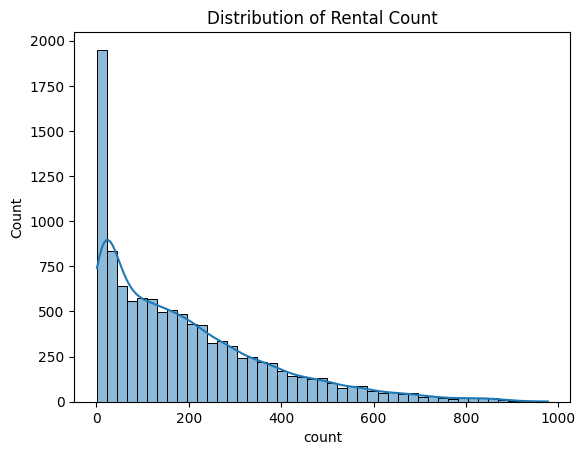

In [18]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089

# Load the dataset
df = pd.read_csv('/content/bike_sharing.csv?1642089089')

# Basic information about the dataset
print(df.info())

# Check for missing values
print(df.isnull().sum())

# Statistical summary
print(df.describe())

# Convert datetime column to datetime type
df['datetime'] = pd.to_datetime(df['datetime'])

# Extract year, month, day from datetime
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour

# Check for data types and correct if necessary
df['season'] = df['season'].astype('category')
df['weather'] = df['weather'].astype('category')
df['holiday'] = df['holiday'].astype('category')
df['workingday'] = df['workingday'].astype('category')

print(df.info())

# Visualize the distribution of the dependent variable (Count)
sns.histplot(df['count'], kde=True)
plt.title('Distribution of Rental Count')
plt.show()

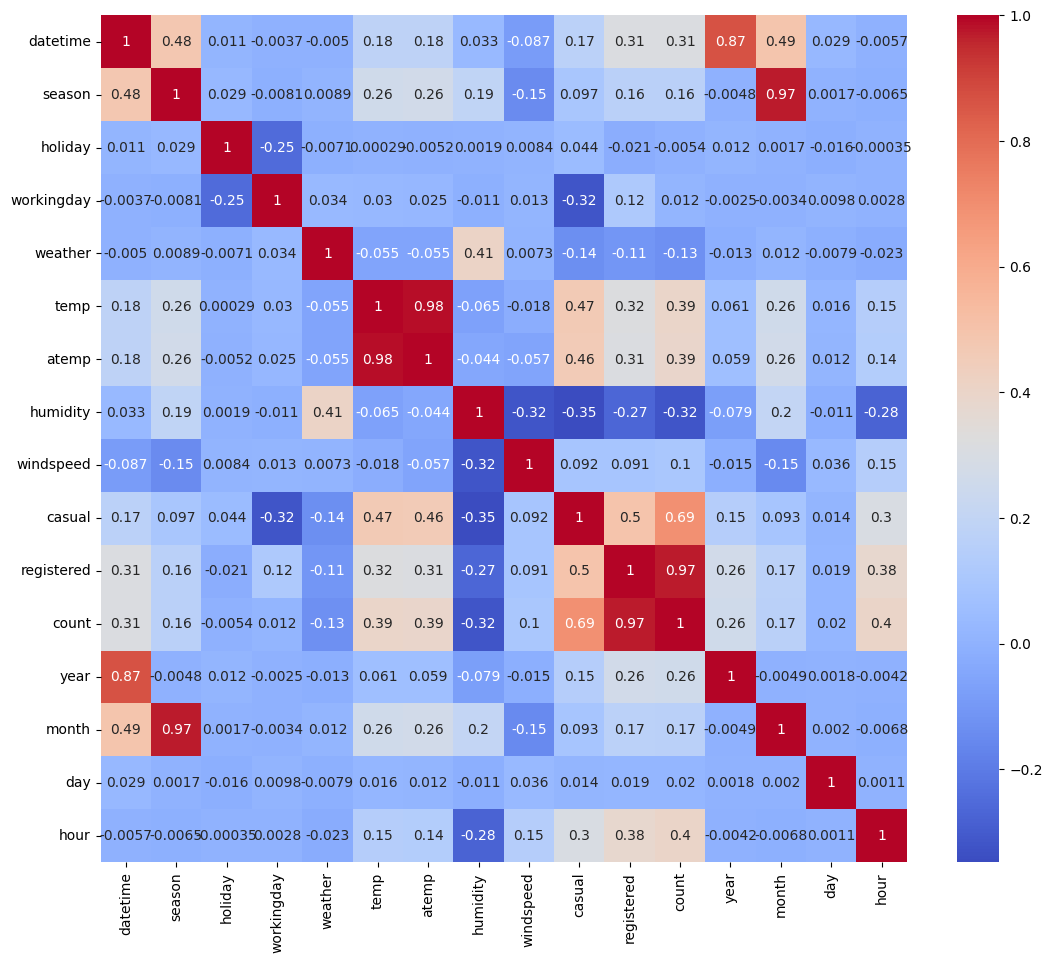

In [20]:
# Correlation matrix to check relationships between numerical variables
corr_matrix = df.corr()
plt.figure(figsize=(13, 11))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [21]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


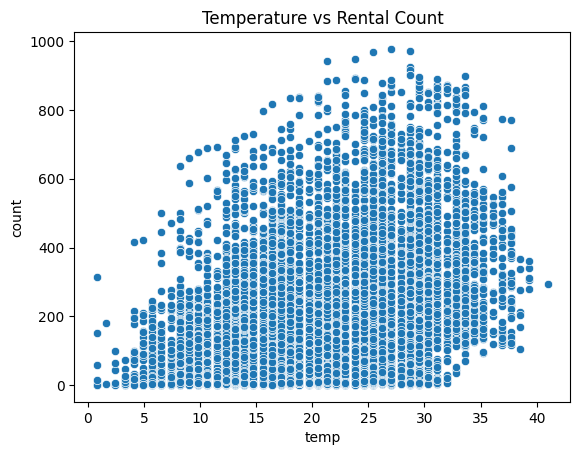

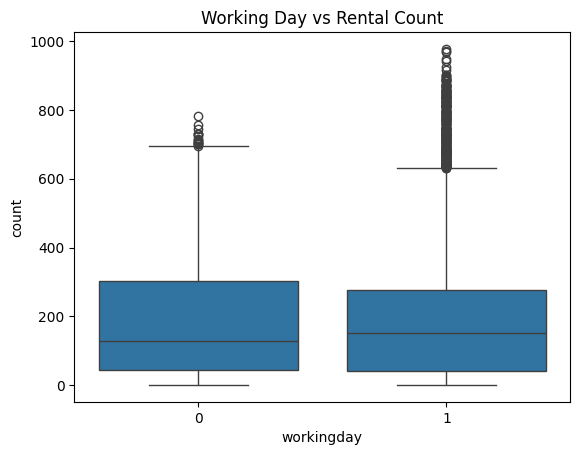

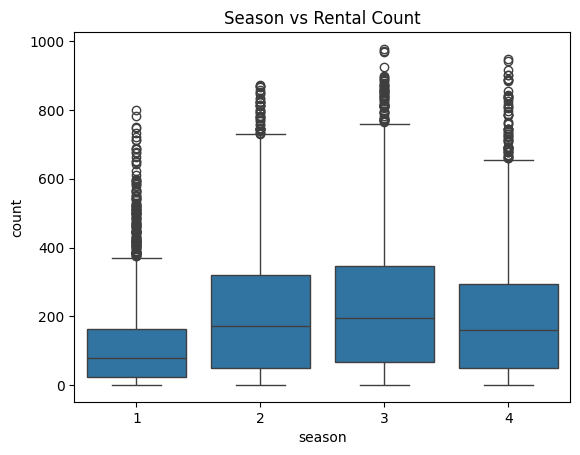

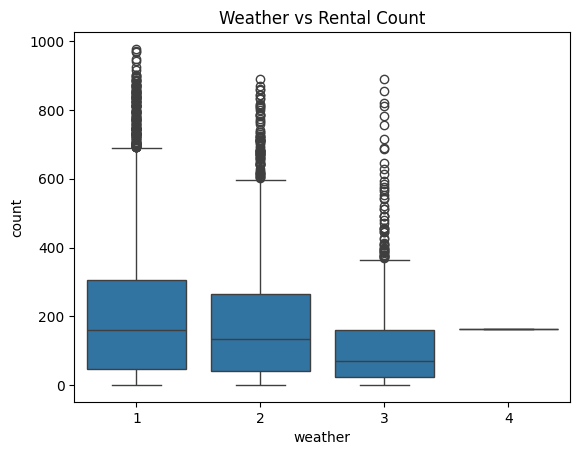

In [24]:
# Scatter plot for count vs. temp
sns.scatterplot(data=df, x='temp', y='count')
plt.title('Temperature vs Rental Count')
plt.show()

# Boxplot for count vs workingday
sns.boxplot(x='workingday', y='count', data=df)
plt.title('Working Day vs Rental Count')
plt.show()

# Boxplot for count vs season
sns.boxplot(x='season', y='count', data=df)
plt.title('Season vs Rental Count')
plt.show()

# Boxplot for count vs weather
sns.boxplot(x='weather', y='count', data=df)
plt.title('Weather vs Rental Count')
plt.show()

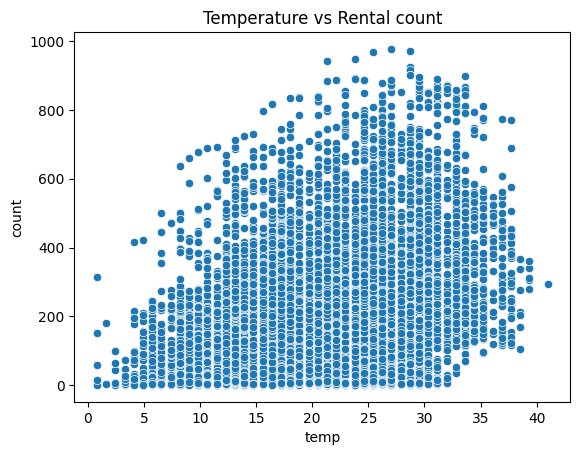

In [35]:
from scipy.stats import ttest_ind

# t_test is used to find the significance of working/nonworking day on rental count. Since both working_day and non-working days are independent varables t_test is used.

# Separate data based on working day
workingday_rentals = df[df['workingday'] == 1]['count']
non_workingday_rentals = df[df['workingday'] == 0]['count']

# Perform independent t-test
t_stat, p_value = ttest_ind(workingday_rentals, non_workingday_rentals, equal_var=False)

print(f'T-statistic: {t_stat}, P-value: {p_value}')

# Decision rule
alpha = 0.05
if p_value < alpha:
    print("Reject Null Hypothesis: Working day has a significant effect on rentals.")
else:
    print("Fail to reject Null Hypothesis: No significant effect of working day on rentals.")

T-statistic: 1.2362580418223226, P-value: 0.21640312280695098
Fail to reject Null Hypothesis: No significant effect of working day on rentals.


In [36]:
from scipy.stats import f_oneway

# To find the significance of seasons ANNOVA is used because we have multiple groups that eeds to be analyzed

# Group by seasons
spring = df[df['season'] == 1]['count']
summer = df[df['season'] == 2]['count']
fall = df[df['season'] == 3]['count']
winter = df[df['season'] == 4]['count']

# Perform ANOVA
f_stat, p_value = f_oneway(spring, summer, fall, winter)

print(f'F-statistic: {f_stat}, P-value: {p_value}')

if p_value < alpha:
    print("Reject Null Hypothesis: There is a significant difference in rentals across seasons.")
else:
    print("Fail to reject Null Hypothesis: No significant difference in rentals across seasons.")

F-statistic: 236.94671081032106, P-value: 6.164843386499654e-149
Reject Null Hypothesis: There is a significant difference in rentals across seasons.


In [60]:
df['season'].value_counts()

,count
season,
4,2734
2,2733
3,2733
1,2686


In [37]:
# Group by weather
clear = df[df['weather'] == 1]['count']
mist = df[df['weather'] == 2]['count']
light_snow_rain = df[df['weather'] == 3]['count']
heavy_rain_snow = df[df['weather'] == 4]['count']

f_stat, p_value = f_oneway(clear, mist, light_snow_rain, heavy_rain_snow)

print(f'F-statistic: {f_stat}, P-value: {p_value}')

if p_value < alpha:
    print("Reject Null Hypothesis: There is a significant difference in rentals across weather conditions.")
else:
    print("Fail to reject Null Hypothesis: No significant difference in rentals across weather conditions.")

F-statistic: 65.53024112793271, P-value: 5.482069475935669e-42
Reject Null Hypothesis: There is a significant difference in rentals across weather conditions.


In [61]:
df['weather'].value_counts()

,count
weather,
1,7192
2,2834
3,859
4,1


In [38]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['weather'], df['season'])

# Perform Chi-Square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f'Chi-Square Statistic: {chi2}, P-value: {p_value}')

if p_value < alpha:
    print("Reject Null Hypothesis: Weather is dependent on season.")
else:
    print("Fail to reject Null Hypothesis: Weather and season are independent.")

Chi-Square Statistic: 49.15865559689363, P-value: 1.5499250736864862e-07
Reject Null Hypothesis: Weather is dependent on season.


In [59]:
# Average bike rentals affected by warmer or cooler days?

from scipy.stats import ttest_ind

median_temp = df["temp"].median()
warmer_days = df[df['temp'] > median_temp]['count']
cooler_days = df[df['temp'] <= median_temp]['count']

t_stat, p_value = ttest_ind(warmer_days, cooler_days, equal_var=False)

print(f'T-statistic: {t_stat}, P-value: {p_value}')

if p_value > alpha:
  print("Failed to reject Null Hypothesis: Bike rentals does no have significance between warmer and cooler days.")
else:
  print("Reject Null Hypothesis: There is significance between warmer and cooler days")

T-statistic: 34.34691343240525, P-value: 8.315632494569042e-244
Reject Null Hypothesis: There is significance between warmer and cooler days


In [65]:
print(warmer_days.sum())
print(cooler_days.sum())

1317174
768302


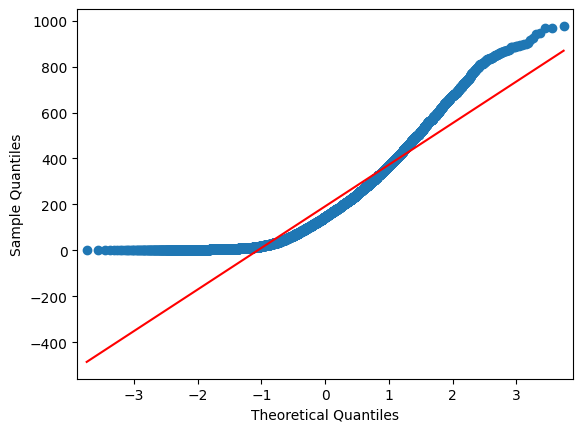

In [39]:
sm.qqplot(df['count'], line='s')
plt.show()

# Test Results

1. The bike rental count **does not significantly differ between working days and non-working days**. This indicates that people rent bikes at similar rates regardless of whether it's a holiday or a working day.
2. **Seasons have a significant impact** on bike rentals, with noticeable variation in rental counts across different seasons.
3. **Weather conditions strongly affect rental counts**. Clear and mild weather conditions lead to higher bike rentals, while extreme weather (rain, snow, or storms) significantly reduces rentals.
4. **Temperature significantly affects bike rentals**, with higher rentals observed on warmer days compared to cooler days. This suggests that people prefer renting bikes in more comfortable, warmer conditions.




# Key Business Insights:
**Seasonal Promotions:** Since rentals vary across seasons, you could implement seasonal promotions during low-demand seasons (e.g., winter). Offering discounts or organizing events can help increase bike rentals when demand is typically lower.

**Weather-based Dynamic Pricing:** Implement dynamic pricing based on weather conditions. For example, during clear or mild weather, standard pricing can apply, but during harsh weather, offer discounts or free rides to encourage usage. On good weather days, consider bundling services or upselling for higher revenue.

**Temperature-triggered Marketing:** Leverage the insight that warmer days see more rentals by using temperature-sensitive marketing strategies. Send push notifications or emails promoting bike rentals when the weather forecast predicts warmer days, encouraging more people to rent bikes on comfortable days.

**Targeted Holiday Campaigns:** Even though rentals do not significantly differ on working vs. non-working days, running targeted campaigns on holidays and weekends, when people have more leisure time, could still improve customer engagement. Focus on family or group promotions during holidays to increase rentals.

**Infrastructure Development:** Since weather has a large impact, cities could consider investing in covered or weather-protected bike stations or rentals with weather protection features (like rain covers), particularly in areas prone to harsh weather. This can encourage bike usage even on rainy or snowy days.

**Corporate and Commuter Plans:** The fact that rentals don't vary significantly between working and non-working days suggests that bikes are used both for commuting and leisure. Offering corporate partnerships with nearby businesses or long-term commuter rental plans could cater to frequent riders who use bikes for commuting.